### Q1 ------- LOGISTIC REGRESSION ------

#### PROBLEM: Classify whether application accepted or not using Logistic regression


In [1]:
# Classify whether application accepted or not using Logistic regression

# card: Factor. Was the application for a credit card accepted?  ==> Y
# reports: Number of major derogatory reports.
# age: Age in years plus twelfths of a year.
# income: Yearly income (in USD 10,000).
# share: Ratio of monthly credit card expenditure to yearly income.
# expenditure: Average monthly credit card expenditure.
# owner: Factor. Does the individual own their home?
# selfemp: Factor. Is the individual self-employed?
# dependents: Number of dependents.
# months: Months living at current address.
# majorcards: Number of major credit cards held.
# active: Number of active credit accounts.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from sklearn.linear_model import LogisticRegression
# train and test 
#from sklearn.cross_validation import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [7]:
A = pd.read_csv("creditcard.csv")
#print(A)
A.head(10)

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,6,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,7,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,8,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,9,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,10,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [ ]:
A.isnull()

In [8]:
A.isnull().sum()
# no null value is there

Unnamed: 0     0
card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [9]:
A.drop(['Unnamed: 0'],inplace=True,axis=1)
A.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [ ]:
#A.shape

In [ ]:
#A.isnull().sum()

In [10]:
A.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [11]:
# Convert "yes" & "No" into "0" & "1"

A['card']=A['card'].apply(lambda x:0 if x=='no' else 1)
A['owner']=A['owner'].apply(lambda x:0 if x=='no' else 1)
A['selfemp']=A['selfemp'].apply(lambda x:0 if x=='no' else 1)

#A.head(10)

In [12]:
A.dtypes

card             int64
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner            int64
selfemp          int64
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [ ]:
# DATA VISUALIZATION

sb.countplot(x="card",data=A,palette="hls",hue="card")
pd.crosstab(A.card,A.owner).plot(kind="bar")

plt.show()
pd.crosstab(A.card,A.owner)


In [ ]:
sb.countplot(x="card",data=A,palette="hls",hue="card")
pd.crosstab(A.card,A.selfemp).plot(kind="bar")

plt.show()
pd.crosstab(A.card,A.selfemp)


In [ ]:
sb.countplot(x="card",data=A,palette="hls",hue="card")
pd.crosstab(A.card,A.dependents).plot(kind="bar")

plt.show()
pd.crosstab(A.card,A.dependents)


In [ ]:
sb.countplot(x="card",data=A,palette="hls",hue="card")
pd.crosstab(A.card,A.majorcards).plot(kind="bar")

plt.show()
pd.crosstab(A.card,A.majorcards)


In [ ]:
sb.countplot(x="card",data=A,palette="hls",hue="card")
pd.crosstab(A.card,A.reports).plot(kind="bar")

plt.show()
pd.crosstab(A.card,A.reports)

In [ ]:
sb.boxplot(x="card",y="reports",data=A,palette="hls")
plt.show()


In [ ]:
sb.boxplot(x="card",y="age",data=A,palette="hls")
plt.show()


In [ ]:
sb.boxplot(x="card",y="income",data=A,palette="hls")
plt.show()


In [ ]:
sb.boxplot(x="card",y="share",data=A,palette="hls")
plt.show()


In [ ]:
sb.boxplot(x="card",y="expenditure",data=A,palette="hls")
plt.show()

In [ ]:
sb.boxplot(x="card",y="expenditure",data=A,palette="hls")
plt.show()

In [ ]:
sb.boxplot(x="card",y="dependents",data=A,palette="hls")
plt.show()

In [ ]:
sb.boxplot(x="card",y="months",data=A,palette="hls")
plt.show()

In [ ]:
sb.boxplot(x="card",y="majorcards",data=A,palette="hls")
plt.show()

In [ ]:
sb.boxplot(x="card",y="active",data=A,palette="hls")
plt.show()

# Model building
### Method 1


In [13]:
from sklearn.linear_model import LogisticRegression

A.shape
X = A.iloc[:,1:]
Y = A.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y)

#classifier.coef_ # coefficients of features (B0,B1)
#classifier.predict_proba (X) # Probability values 

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = classifier.predict(X)
A.insert(loc=0, column='Pred', value=y_pred)


In [ ]:
print(y_pred)

In [ ]:
A.Pred.head(10)

In [ ]:
A.head(10)

In [15]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([A,y_prob],axis=1)
A.head(10)


,Pred,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
5,1,1,0,23.25000,2.5000,0.044438,91.996670,0,0,0,54,1,1
6,1,1,0,27.91667,3.9600,0.012576,40.833330,0,0,2,7,1,5
7,1,1,0,29.16667,2.3700,0.076434,150.790000,1,0,0,77,1,3
8,1,1,0,37.00000,3.8000,0.245628,777.821700,1,0,0,97,1,6
9,1,1,0,28.41667,3.2000,0.019780,52.580000,0,0,0,65,1,18


In [16]:
print(y_prob)  # probability of predicted y values


                 0         1
0     0.000000e+00  1.000000
1     2.016513e-06  0.999998
2     1.498009e-09  1.000000
3     0.000000e+00  1.000000
4     0.000000e+00  1.000000
...            ...       ...
1314  9.463580e-06  0.999991
1315  9.999926e-01  0.000007
1316  0.000000e+00  1.000000
1317  0.000000e+00  1.000000
1318  0.000000e+00  1.000000

[1319 rows x 2 columns]


In [ ]:
#print(new_df)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)
#type(y_pred)

[[ 295    1]
 [  23 1000]]


In [18]:
# Accuracy = total no of correctly predicted cases/total no of observations = TP+TN/TP+TN+FP+FN
accuracy = sum(Y==y_pred)/A.shape[0]
accuracy #   98.18

#[ 295    1]
#[  23 1000]


0.9818043972706596

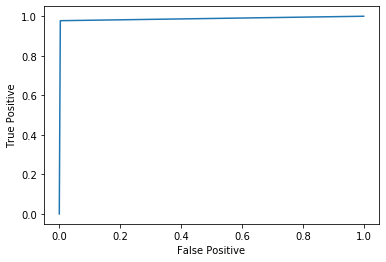

In [19]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(A.card, y_pred)

# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
 
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 



## Before running another method of logistic model clear all the previous codes output

### And just run the cells above Model 1

In [20]:
#Model building 
import statsmodels.formula.api as sm
logit_model = sm.logit('card~reports+age+income+share+expenditure+owner+selfemp+dependents+months+majorcards+active',data=A).fit(method='bfgs')
#p value for shares = 1.. hence we can discard shares variable in the model
#summary
logit_model.summary()

         Current function value: 0.057530
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   card   No. Observations:                 1319
Model:                          Logit   Df Residuals:                     1307
Method:                           MLE   Df Model:                           11
Date:                Sun, 24 May 2020   Pseudo R-squ.:                  0.8919
Time:                        14:59:55   Log-Likelihood:                -75.882
converged:                      False   LL-Null:                       -702.28
Covariance Type:            nonrobust   LLR p-value:                6.720e-262
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.2296      1.053     -4.017      0.000      -6.293      -2.166
reports        -1.8160      0.565     -3.213      0.001      -2.924      -0.708
age             0.0446      0.021      2.096      0.036       0.003       0.086
income          0.0161      0.159      0.101      0.919      -0.296       0.328
share           0.0108    477.952   2.26e-05      1.000    -936.757     936.779
expenditure     0.5435      0.218      2.498      0.012       0.117       0.970
owner          -0.1157      0.486     -0.238      0.812      -1.069       0.837
selfemp         0.6001      0.572      1.050      0.294      -0.520       1.720
dependents     -0.4273      0.192     -2.223      0.026      -0.804      -0.051
months         -0.0021      0.003     -0.620      0.535      -0.009       0.004
majorcards      1.2699      0.589      2.156      0.031       0.115       2.425
active          0.0623      0.031      2.036      0.042       0.002       0.122
===============================================================================

Possibly complete quasi-separation: A fraction 0.72 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [7]:
#applying log transformation to share variable
A['share'] = np.log(A['share'])
A.head()
logit_model1 = sm.logit('card~reports+age+income+share+expenditure+owner+selfemp+dependents+months+majorcards+active',data=A).fit(method='bfgs')
logit_model1.summary()
 

         Current function value: 0.063649
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   card   No. Observations:                 1319
Model:                          Logit   Df Residuals:                     1307
Method:                           MLE   Df Model:                           11
Date:                Tue, 19 May 2020   Pseudo R-squ.:                  0.8805
Time:                        02:02:03   Log-Likelihood:                -83.953
converged:                      False   LL-Null:                       -702.28
Covariance Type:            nonrobust   LLR p-value:                2.030e-258
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.3182      3.771      0.615      0.539      -5.073       9.710
reports        -3.8218      0.978     -3.908      0.000      -5.739      -1.905
age             0.0384      0.020      1.879      0.060      -0.002       0.078
income          0.2285      0.205      1.113      0.266      -0.174       0.631
share           0.9372      0.537      1.747      0.081      -0.114       1.989
expenditure     0.2107      0.118      1.790      0.073      -0.020       0.441
owner           0.2757      0.458      0.602      0.547      -0.622       1.173
selfemp         0.3811      0.600      0.635      0.525      -0.795       1.557
dependents     -0.3105      0.178     -1.744      0.081      -0.659       0.038
months         -0.0039      0.003     -1.142      0.253      -0.011       0.003
majorcards      1.4300      0.556      2.574      0.010       0.341       2.519
active          0.1332      0.033      4.059      0.000       0.069       0.198
===============================================================================

Possibly complete quasi-separation: A fraction 0.73 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [8]:
# Creating new column for storing predicted class of card

y_pred = logit_model1.predict(A)
y_pred
A["pred_prob"] = y_pred

In [10]:
# filling all the cells with zeroes
A["Att_val"] = 0


In [12]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
A.loc[y_pred>=0.5,"Att_val"] = 1
A.Att_val


0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: Att_val, Length: 1319, dtype: int64

In [13]:
from sklearn.metrics import classification_report
classification_report(A.Att_val,A.card)

# confusion matrix 
confusion_matrix = pd.crosstab(A['card'],A.Att_val)
confusion_matrix
accuracy = (290+999)/(290+999+24+6) # 97.72
accuracy


0.9772554965883244

0.9953865155478059

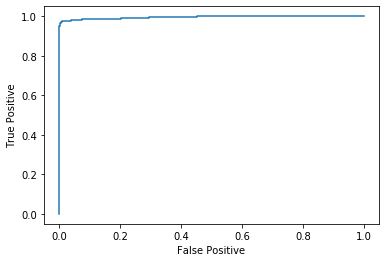

In [15]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(A.card, y_pred)


# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
 
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 
roc_auc #0.9953



In [16]:
### Dividing data into train and test data sets
A.drop("Att_val",axis=1,inplace=True)
from sklearn.model_selection import train_test_split

train,test = train_test_split(A,test_size=0.3)

# checking na values 
train.isnull().sum();test.isnull().sum()

# Building a model on train data set 

train_model = sm.logit('card~reports+age+income+share+expenditure+owner+selfemp+dependents+months+majorcards+active',data = A).fit()

#summary
train_model.summary()
train_pred = train_model.predict(train.iloc[:,1:])


         Current function value: 0.042165
         Iterations: 35


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [29]:
train.shape

(923, 14)

In [21]:
# Creating new column for storing predicted class of card

# filling all the cells with zeroes
train["train_pred"] = np.zeros(923)

# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
train.loc[train_pred>0.5,"train_pred"] = 1


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
# confusion matrix 
confusion_matrix = pd.crosstab(train['card'],train.train_pred)

confusion_matrix


train_pred,0.0,1.0
card,,
0,198,2
1,13,710


In [25]:

accuracy_train = (198+710)/(198+2+13+710) # 98.37
accuracy_train


0.9837486457204767

0.9980221300138312

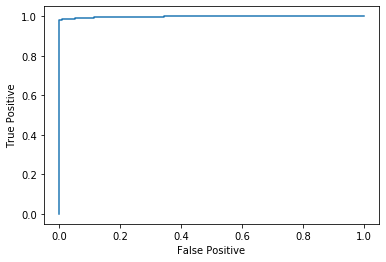

In [36]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(train.card, train_pred)


# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
 
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 
roc_auc #0.9980



In [30]:
test.shape

(396, 13)

In [31]:
# Prediction on Test data set

test_pred = train_model.predict(test)

# Creating new column for storing predicted class of card

# filling all the cells with zeroes
test["test_pred"] = np.zeros(396)



C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
test.loc[test_pred>0.5,"test_pred"] = 1

# confusion matrix 
confusion_matrix = pd.crosstab(test['card'],test.test_pred)

confusion_matrix



test_pred,0.0,1.0
card,,
0,96,0
1,7,293


In [34]:
accuracy_test = (96+293)/(96+7+293) # 98.23
accuracy_test


0.9823232323232324

0.99625

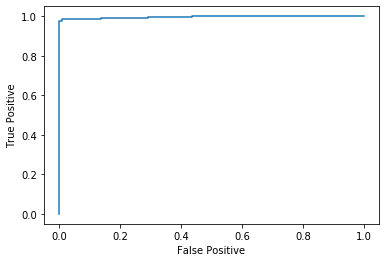

In [37]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(test.card, test_pred)


# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
 
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 
roc_auc #0.9962

